In [1]:
!ls

 benchmark.py		     helper_functions_titanlib.py   README.md
 create_sets.py		    "my_titanlib'.py"		    SCT.py
 data			     my_titanlib.py		    TCT.py
 data1.tar.bz2		     optimizer.py		    titanlib_test.ipynb
 df.py			     pressure_check.ipynb
 helper_functions_titanlib   __pycache__


In [2]:
import os
import numpy as np
import pandas as pd
from df import df
import titanlib

print(df)



       station           timestamp     min      max            file_type
0       4201.0 1997-06-10 00:00:00  1008.7  1012.45  data/data1/combined
1       4201.0 1997-06-10 01:00:00  1009.0  1012.76  data/data1/combined
2       4201.0 1997-06-10 02:00:00  1009.2  1012.96  data/data1/combined
3       4201.0 1997-06-10 03:00:00  1009.2  1012.98  data/data1/combined
4       4201.0 1997-06-10 04:00:00  1009.5  1013.28  data/data1/combined
...        ...                 ...     ...      ...                  ...
67628   6193.0 1997-06-28 09:00:00  1007.3  1008.60  data/data1/combined
67629   6193.0 1997-06-28 12:00:00  1008.3  1009.60  data/data1/combined
67630   6193.0 1997-06-28 15:00:00  1010.1  1011.40  data/data1/combined
67631   6193.0 1997-06-28 18:00:00  1011.4  1012.70  data/data1/combined
67632   6193.0 1997-06-28 21:00:00  1012.6  1013.90  data/data1/combined

[67633 rows x 5 columns]


In [3]:
from scipy.interpolate import interp1d
from create_sets import create_sets
import datetime

In [ ]:
import matplotlib.pyplot as plt
import time
import titanlib
import datetime

threshold = 2 # TO BE OPTIMIZED
max_elev_diff = -1 #200
elev_gradient = -0.0065
min_std = 1 # TO BE OPTIMIZED
radius= [90000] # TO BE OPTIMIZED
num_min=[4] # TO BE OPTIMIZED ?
num_iterations = 50
obs_to_check= [1,0,0,0,0,0,0,0]

plt.figure(figsize=(20,3))

xs, _ = create_sets(6096)

fs, points, obs_to_check= prepare_test(6096)
values=[]

obs_to_check=lst = [1]+[0] * (len(fs)-1)

for x in xs:
    values=[]
    for f in fs:
        values.append(f(x).tolist())
    
    flags=titanlib.buddy_check(points, values,  radius ,num_min,threshold, max_elev_diff, elev_gradient, min_std, num_iterations,obs_to_check)
    if(flags[0]==1):
        plt.plot(x, values[0], 'r.')
    else:
        plt.plot(x, values[0], 'b.')

In [ ]:
from benchmark import calculate_acc

from my_titanlib import my_SCT, my_buddy_check

In [ ]:
xs, f = create_sets(6096)

t1=time.time()
acc= calculate_acc(xs, f, my_SCT(6096),[2,4,50000, 150000], std=3.,n_trials=1000)
print(time.time()-t1)
#TODO: Optimize the parameters





print(acc)

In [ ]:
!pip install bayesian-optimization

|   iter    |  target   |    p0     |
-------------------------------------
|  1        |  0.5      |  0.417    |
|  2        |  0.5      |  0.7203   |
|  3        |  0.5      |  0.000114 |
|  4        |  0.5      |  0.3023   |
|  5        |  0.671    |  0.1468   |
|  6        |  0.705    |  0.09234  |
|  7        |  0.5      |  0.1863   |
|  8        |  0.5      |  0.3456   |
|  9        |  0.5      |  0.3968   |
|  10       |  0.5      |  0.5388   |
|  11       |  0.753    |  0.1173   |
|  12       |  0.778    |  0.1104   |
|  13       |  0.527    |  0.05096  |
|  14       |  0.776    |  0.1045   |
|  15       |  0.771    |  0.1173   |
|  16       |  0.792    |  0.1175   |
|  17       |  0.769    |  0.1106   |
|  18       |  0.765    |  0.1043   |
|  19       |  0.758    |  0.1048   |
|  20       |  0.768    |  0.1102   |
|  21       |  0.773    |  0.1099   |
|  22       |  0.77     |  0.1096   |
|  23       |  0.764    |  0.1093   |
|  24       |  0.775    |  0.109    |
|  25       

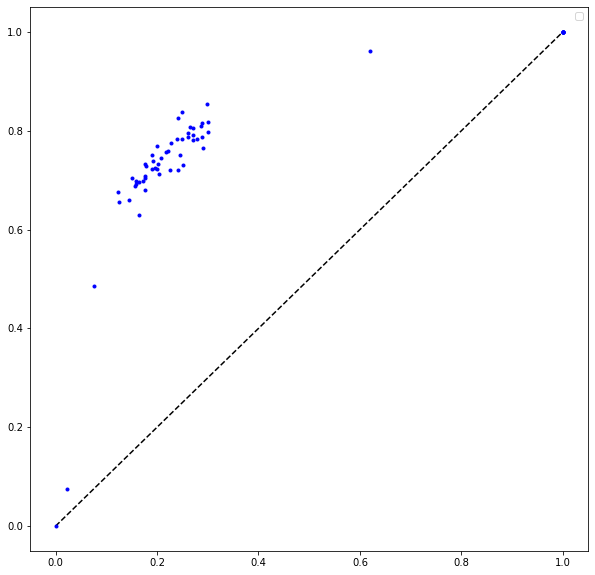

In [45]:
from optimizer import optimize_test
from SCT import build_pdfs
from my_titanlib import my_SCT, my_buddy_check
import matplotlib.pyplot as plt
plot=True
if plot==True:
        plt.figure(figsize=(10,10))

        plt.plot(np.linspace(0,1,100),np.linspace(0,1,100), 'k--')

        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles))
        plt.legend(by_label.values(), by_label.keys())

xs, f = create_sets(4242)
best=optimize_test(4242, 'build_pdfs', std=1.5, plot=plot)
print(best)
acc= calculate_acc(xs, f, build_pdfs(4242)[0],list(best['params'].values())
, std=1.5, n_trials=10000)
print(acc)

In [67]:
test_properties= pd.DataFrame(columns=['station', 'test_name' , 'params', 'confusion_matrix' ])

|   iter    |  target   |    p0     |
-------------------------------------
|  1        |  0.515    |  0.417    |
|  2        |  0.5      |  0.7203   |
|  3        |  0.5      |  0.000114 |
|  4        |  0.717    |  0.3023   |
|  5        |  0.852    |  0.1468   |
|  6        |  0.773    |  0.09234  |
|  7        |  0.864    |  0.1863   |
|  8        |  0.678    |  0.3456   |
|  9        |  0.555    |  0.3968   |
|  10       |  0.5      |  0.5388   |
|  11       |  0.853    |  0.2162   |
|  12       |  0.869    |  0.17     |
|  13       |  0.86     |  0.1745   |
|  14       |  0.792    |  0.2552   |
|  15       |  0.855    |  0.1862   |
|  16       |  0.876    |  0.1867   |
|  17       |  0.846    |  0.1705   |
|  18       |  0.865    |  0.1752   |
|  19       |  0.828    |  0.2155   |
|  20       |  0.85     |  0.1475   |
|  21       |  0.869    |  0.1692   |
|  22       |  0.851    |  0.1685   |
|  23       |  0.854    |  0.176    |
|  24       |  0.841    |  0.217    |
|  25       

|  9        |  0.5      |  0.3968   |
|  10       |  0.5      |  0.5388   |
|  11       |  0.558    |  0.07459  |
|  12       |  0.602    |  0.06761  |
|  13       |  0.554    |  0.06243  |
|  14       |  0.554    |  0.07004  |
|  15       |  0.603    |  0.06761  |
|  16       |  0.581    |  0.06786  |
|  17       |  0.615    |  0.07419  |
|  18       |  0.61     |  0.07395  |
|  19       |  0.58     |  0.07356  |
|  20       |  0.607    |  0.07303  |
|  21       |  0.596    |  0.07266  |
|  22       |  0.579    |  0.07215  |
|  23       |  0.59     |  0.07157  |
|  24       |  0.568    |  0.07107  |
|  25       |  0.592    |  0.06142  |
|  26       |  0.583    |  0.06095  |
|  27       |  0.595    |  0.06034  |
|  28       |  0.571    |  0.05986  |
|  29       |  0.607    |  0.06184  |
|  30       |  0.556    |  0.05893  |
|  31       |  0.579    |  0.08157  |
|  32       |  0.567    |  0.08218  |
|  33       |  0.577    |  0.08096  |
|  34       |  0.549    |  0.08031  |
|  35       

|  17       |  0.924    |  0.2107   |
|  18       |  0.909    |  0.2678   |
|  19       |  0.894    |  0.2371   |
|  20       |  0.906    |  0.2067   |
|  21       |  0.91     |  0.2452   |
|  22       |  0.904    |  0.2495   |
|  23       |  0.91     |  0.2185   |
|  24       |  0.921    |  0.2229   |
|  25       |  0.891    |  0.2274   |
|  26       |  0.911    |  0.2322   |
|  27       |  0.915    |  0.2018   |
|  28       |  0.918    |  0.1973   |
|  29       |  0.889    |  0.1936   |
|  30       |  0.913    |  0.2042   |
|  31       |  0.909    |  0.2207   |
|  32       |  0.907    |  0.1995   |
|  33       |  0.898    |  0.2162   |
|  34       |  0.909    |  0.2088   |
|  35       |  0.911    |  0.2123   |
|  36       |  0.907    |  0.203    |
|  37       |  0.914    |  0.2054   |
|  38       |  0.917    |  0.2099   |
|  39       |  0.906    |  0.2149   |
|  40       |  0.912    |  0.2175   |
|  41       |  0.903    |  0.2113   |
|  42       |  0.915    |  0.2078   |
|  43       

|  25       |  0.59     |  0.1089   |
|  26       |  0.586    |  0.1092   |
|  27       |  0.568    |  0.1096   |
|  28       |  0.588    |  0.1351   |
|  29       |  0.59     |  0.1348   |
|  30       |  0.564    |  0.1344   |
|  31       |  0.587    |  0.1364   |
|  32       |  0.568    |  0.1367   |
|  33       |  0.555    |  0.1102   |
|  34       |  0.578    |  0.1233   |
|  35       |  0.591    |  0.1237   |
|  36       |  0.61     |  0.124    |
|  37       |  0.57     |  0.1242   |
|  38       |  0.564    |  0.1157   |
|  39       |  0.6      |  0.1166   |
|  40       |  0.614    |  0.1173   |
|  41       |  0.587    |  0.117    |
|  42       |  0.561    |  0.1176   |
|  43       |  0.591    |  0.1163   |
|  44       |  0.572    |  0.1132   |
|  45       |  0.601    |  0.1137   |
|  46       |  0.567    |  0.114    |
|  47       |  0.582    |  0.1196   |
|  48       |  0.596    |  0.12     |
|  49       |  0.59     |  0.1192   |
|  50       |  0.595    |  0.1189   |
|  51       

|  34       |  0.5      |  0.4033   |
|  35       |  0.5      |  0.4046   |
|  36       |  0.5      |  0.4282   |
|  37       |  0.5      |  0.4271   |
|  38       |  0.5      |  0.408    |
|  39       |  0.5      |  0.4251   |
|  40       |  0.5      |  0.4097   |
|  41       |  0.5      |  0.4105   |
|  42       |  0.5      |  0.4229   |
|  43       |  0.5      |  0.4117   |
|  44       |  0.5      |  0.4217   |
|  45       |  0.5      |  0.4213   |
|  46       |  0.5      |  0.4131   |
|  47       |  0.5      |  0.4135   |
|  48       |  0.5      |  0.4201   |
|  49       |  0.5      |  0.4142   |
|  50       |  0.5      |  0.4196   |
|  51       |  0.5      |  0.4193   |
|  52       |  0.5      |  0.415    |
|  53       |  0.5      |  0.4188   |
|  54       |  0.5      |  0.4184   |
|  55       |  0.5      |  0.4157   |
|  56       |  0.5      |  0.4157   |
|  57       |  0.5      |  0.4182   |
|  58       |  0.5      |  0.4181   |
|  59       |  0.5      |  0.4163   |
|  60       

|  45       |  0.5      |  0.4213   |
|  46       |  0.5      |  0.4131   |
|  47       |  0.5      |  0.4135   |
|  48       |  0.5      |  0.4201   |
|  49       |  0.5      |  0.4142   |
|  50       |  0.5      |  0.4196   |
|  51       |  0.5      |  0.4193   |
|  52       |  0.5      |  0.415    |
|  53       |  0.5      |  0.4188   |
|  54       |  0.5      |  0.4184   |
|  55       |  0.5      |  0.4157   |
|  56       |  0.5      |  0.4157   |
|  57       |  0.5      |  0.4182   |
|  58       |  0.5      |  0.4181   |
|  59       |  0.5      |  0.4163   |
|  60       |  0.5      |  0.4179   |
no stations in the range
no stations in the range
|   iter    |  target   |    p0     |
-------------------------------------
|  1        |  0.5      |  0.417    |
|  2        |  0.5      |  0.7203   |
|  3        |  0.5      |  0.000114 |
|  4        |  0.5      |  0.3023   |
|  5        |  0.5      |  0.1468   |
|  6        |  0.5      |  0.09234  |
|  7        |  0.5      |  0.1863   |


|  52       |  0.521    |  0.01416  |
|  53       |  0.502    |  0.01445  |
|  54       |  0.528    |  0.01411  |
|  55       |  0.512    |  0.0141   |
|  56       |  0.537    |  0.01419  |
|  57       |  0.521    |  0.01418  |
|  58       |  0.529    |  0.0142   |
|  59       |  0.519    |  0.01423  |
|  60       |  0.514    |  0.01459  |
|   iter    |  target   |    p0     |
-------------------------------------
|  1        |  0.5      |  0.417    |
|  2        |  0.5      |  0.7203   |
|  3        |  0.5      |  0.000114 |
|  4        |  0.636    |  0.3023   |
|  5        |  0.852    |  0.1468   |
|  6        |  0.657    |  0.09234  |
|  7        |  0.903    |  0.1863   |
|  8        |  0.514    |  0.3456   |
|  9        |  0.5      |  0.3968   |
|  10       |  0.5      |  0.5388   |
|  11       |  0.911    |  0.218    |
|  12       |  0.893    |  0.2053   |
|  13       |  0.838    |  0.2472   |
|  14       |  0.885    |  0.1688   |
|  15       |  0.903    |  0.1862   |
|  16       

|  60       |  0.868    |  0.2711   |
|   iter    |  target   |    p0     |
-------------------------------------
|  1        |  0.5      |  0.417    |
|  2        |  0.5      |  0.7203   |
|  3        |  0.504    |  0.000114 |
|  4        |  0.5      |  0.3023   |
|  5        |  0.713    |  0.1468   |
|  6        |  0.705    |  0.09234  |
|  7        |  0.651    |  0.1863   |
|  8        |  0.5      |  0.3456   |
|  9        |  0.5      |  0.3968   |
|  10       |  0.5      |  0.5388   |
|  11       |  0.731    |  0.1202   |
|  12       |  0.738    |  0.1252   |
|  13       |  0.692    |  0.05957  |
|  14       |  0.61     |  0.2266   |
|  15       |  0.71     |  0.1202   |
|  16       |  0.69     |  0.1203   |
|  17       |  0.714    |  0.1252   |
|  18       |  0.728    |  0.1251   |
|  19       |  0.717    |  0.1468   |
|  20       |  0.702    |  0.125    |
|  21       |  0.7      |  0.09245  |
|  22       |  0.712    |  0.147    |
|  23       |  0.718    |  0.1471   |
|  24       

|  8        |  0.66     |  0.3456   |
|  9        |  0.549    |  0.3968   |
|  10       |  0.5      |  0.5388   |
|  11       |  0.844    |  0.2377   |
|  12       |  0.872    |  0.1661   |
|  13       |  0.872    |  0.2074   |
|  14       |  0.865    |  0.1332   |
|  15       |  0.875    |  0.2074   |
|  16       |  0.864    |  0.2061   |
|  17       |  0.87     |  0.1848   |
|  18       |  0.886    |  0.1451   |
|  19       |  0.892    |  0.1679   |
|  20       |  0.905    |  0.1698   |
|  21       |  0.862    |  0.1717   |
|  22       |  0.846    |  0.1353   |
|  23       |  0.859    |  0.1429   |
|  24       |  0.884    |  0.1886   |
|  25       |  0.865    |  0.1907   |
|  26       |  0.865    |  0.1492   |
|  27       |  0.872    |  0.1516   |
|  28       |  0.877    |  0.1539   |
|  29       |  0.876    |  0.1563   |
|  30       |  0.867    |  0.1586   |
|  31       |  0.864    |  0.1612   |
|  32       |  0.893    |  0.1636   |
|  33       |  0.892    |  0.1821   |
|  34       

|  16       |  0.863    |  0.2486   |
|  17       |  0.875    |  0.2466   |
|  18       |  0.858    |  0.2632   |
|  19       |  0.826    |  0.2298   |
|  20       |  0.886    |  0.2447   |
|  21       |  0.856    |  0.2437   |
|  22       |  0.892    |  0.2277   |
|  23       |  0.872    |  0.2266   |
|  24       |  0.885    |  0.2254   |
|  25       |  0.884    |  0.2242   |
|  26       |  0.886    |  0.223    |
|  27       |  0.869    |  0.2218   |
|  28       |  0.88     |  0.2204   |
|  29       |  0.858    |  0.2192   |
|  30       |  0.874    |  0.2177   |
|  31       |  0.872    |  0.2164   |
|  32       |  0.866    |  0.215    |
|  33       |  0.866    |  0.2137   |
|  34       |  0.866    |  0.2322   |
|  35       |  0.873    |  0.2335   |
|  36       |  0.854    |  0.2348   |
|  37       |  0.883    |  0.2364   |
|  38       |  0.886    |  0.2311   |
|  39       |  0.893    |  0.2211   |
|  40       |  0.856    |  0.2184   |
|  41       |  0.879    |  0.2157   |
|  42       

|  24       |  0.812    |  0.2313   |
|  25       |  0.819    |  0.2311   |
|  26       |  0.805    |  0.231    |
|  27       |  0.781    |  0.2138   |
|  28       |  0.823    |  0.2323   |
|  29       |  0.81     |  0.2325   |
|  30       |  0.815    |  0.2327   |
|  31       |  0.826    |  0.2308   |
|  32       |  0.809    |  0.2131   |
|  33       |  0.806    |  0.2129   |
|  34       |  0.81     |  0.2127   |
|  35       |  0.822    |  0.2125   |
|  36       |  0.814    |  0.2123   |
|  37       |  0.795    |  0.2121   |
|  38       |  0.801    |  0.2119   |
|  39       |  0.816    |  0.2117   |
|  40       |  0.807    |  0.2115   |
|  41       |  0.825    |  0.2113   |
|  42       |  0.805    |  0.2112   |
|  43       |  0.807    |  0.2109   |
|  44       |  0.806    |  0.2107   |
|  45       |  0.794    |  0.2105   |
|  46       |  0.822    |  0.2103   |
|  47       |  0.806    |  0.2101   |
|  48       |  0.807    |  0.214    |
|  49       |  0.812    |  0.2142   |
|  50       

|  32       |  0.96     |  0.2185   |
|  33       |  0.942    |  0.2171   |
|  34       |  0.944    |  0.2155   |
|  35       |  0.95     |  0.2139   |
|  36       |  0.942    |  0.2124   |
|  37       |  0.943    |  0.2109   |
|  38       |  0.943    |  0.2091   |
|  39       |  0.95     |  0.201    |
|  40       |  0.955    |  0.2082   |
|  41       |  0.958    |  0.21     |
|  42       |  0.946    |  0.2116   |
|  43       |  0.948    |  0.2052   |
|  44       |  0.951    |  0.2038   |
|  45       |  0.961    |  0.2065   |
|  46       |  0.961    |  0.2086   |
|  47       |  0.959    |  0.2027   |
|  48       |  0.948    |  0.2077   |
|  49       |  0.937    |  0.2062   |
|  50       |  0.957    |  0.2056   |
|  51       |  0.96     |  0.2068   |
|  52       |  0.957    |  0.2041   |
|  53       |  0.974    |  0.2049   |
|  54       |  0.945    |  0.2034   |
|  55       |  0.956    |  0.205    |
|  56       |  0.945    |  0.2047   |
|  57       |  0.959    |  0.2043   |
|  58       

|  40       |  0.849    |  0.2067   |
|  41       |  0.842    |  0.2078   |
|  42       |  0.866    |  0.2112   |
|  43       |  0.872    |  0.2085   |
|  44       |  0.892    |  0.2133   |
|  45       |  0.869    |  0.2166   |
|  46       |  0.868    |  0.2145   |
|  47       |  0.86     |  0.2155   |
|  48       |  0.854    |  0.2124   |
|  49       |  0.869    |  0.2115   |
|  50       |  0.856    |  0.2131   |
|  51       |  0.87     |  0.2136   |
|  52       |  0.862    |  0.2142   |
|  53       |  0.867    |  0.2126   |
|  54       |  0.871    |  0.2147   |
|  55       |  0.855    |  0.2134   |
|  56       |  0.861    |  0.2121   |
|  57       |  0.88     |  0.2137   |
|  58       |  0.871    |  0.2132   |
|  59       |  0.851    |  0.2129   |
|  60       |  0.853    |  0.2141   |
|   iter    |  target   |    p0     |
-------------------------------------
|  1        |  0.5      |  0.417    |
|  2        |  0.5      |  0.7203   |
|  3        |  0.5      |  0.000114 |
|  4        

|  48       |  0.968    |  0.2075   |
|  49       |  0.975    |  0.2043   |
|  50       |  0.978    |  0.2087   |
|  51       |  0.967    |  0.2061   |
|  52       |  0.972    |  0.2081   |
|  53       |  0.973    |  0.2055   |
|  54       |  0.972    |  0.2049   |
|  55       |  0.973    |  0.2065   |
|  56       |  0.974    |  0.207    |
|  57       |  0.978    |  0.2063   |
|  58       |  0.984    |  0.2064   |
|  59       |  0.974    |  0.2057   |
|  60       |  0.972    |  0.2064   |
|   iter    |  target   |    p0     |
-------------------------------------
|  1        |  0.796    |  0.417    |
|  2        |  0.5      |  0.7203   |
|  3        |  0.5      |  0.000114 |
|  4        |  0.941    |  0.3023   |
|  5        |  0.86     |  0.1468   |
|  6        |  0.734    |  0.09234  |
|  7        |  0.915    |  0.1863   |
|  8        |  0.901    |  0.3456   |
|  9        |  0.829    |  0.3968   |
|  10       |  0.58     |  0.5388   |
|  11       |  0.974    |  0.2532   |
|  12       

|  56       |  0.934    |  0.1795   |
|  57       |  0.949    |  0.1798   |
|  58       |  0.941    |  0.1802   |
|  59       |  0.935    |  0.1813   |
|  60       |  0.96     |  0.1811   |
|   iter    |  target   |    p0     |
-------------------------------------
|  1        |  0.538    |  0.417    |
|  2        |  0.5      |  0.7203   |
|  3        |  0.5      |  0.000114 |
|  4        |  0.791    |  0.3023   |
|  5        |  0.812    |  0.1468   |
|  6        |  0.705    |  0.09234  |
|  7        |  0.863    |  0.1863   |
|  8        |  0.705    |  0.3456   |
|  9        |  0.608    |  0.3968   |
|  10       |  0.5      |  0.5388   |
|  11       |  0.876    |  0.2384   |
|  12       |  0.883    |  0.2156   |
|  13       |  0.879    |  0.224    |
|  14       |  0.848    |  0.2608   |
|  15       |  0.873    |  0.224    |
|  16       |  0.902    |  0.2234   |
|  17       |  0.883    |  0.2148   |
|  18       |  0.861    |  0.2376   |
|  19       |  0.854    |  0.1853   |
|  20       

|  3        |  0.5      |  0.000114 |
|  4        |  0.727    |  0.3023   |
|  5        |  0.816    |  0.1468   |
|  6        |  0.731    |  0.09234  |
|  7        |  0.851    |  0.1863   |
|  8        |  0.594    |  0.3456   |
|  9        |  0.506    |  0.3968   |
|  10       |  0.5      |  0.5388   |
|  11       |  0.892    |  0.2303   |
|  12       |  0.856    |  0.2425   |
|  13       |  0.891    |  0.2131   |
|  14       |  0.892    |  0.2221   |
|  15       |  0.883    |  0.2131   |
|  16       |  0.889    |  0.2125   |
|  17       |  0.884    |  0.231    |
|  18       |  0.882    |  0.2213   |
|  19       |  0.89     |  0.223    |
|  20       |  0.876    |  0.2239   |
|  21       |  0.892    |  0.2293   |
|  22       |  0.875    |  0.2284   |
|  23       |  0.891    |  0.2203   |
|  24       |  0.893    |  0.2192   |
|  25       |  0.876    |  0.2182   |
|  26       |  0.868    |  0.217    |
|  27       |  0.862    |  0.2322   |
|  28       |  0.886    |  0.2251   |
|  29       

|  11       |  0.997    |  0.2431   |
|  12       |  0.991    |  0.2214   |
|  13       |  0.985    |  0.2667   |
|  14       |  0.995    |  0.2362   |
|  15       |  0.991    |  0.2362   |
|  16       |  0.995    |  0.2347   |
|  17       |  0.993    |  0.2451   |
|  18       |  0.992    |  0.2235   |
|  19       |  0.981    |  0.2644   |
|  20       |  0.977    |  0.2999   |
|  21       |  0.982    |  0.226    |
|  22       |  0.992    |  0.2188   |
|  23       |  0.985    |  0.2163   |
|  24       |  0.986    |  0.2136   |
|  25       |  0.979    |  0.2109   |
|  26       |  0.993    |  0.2478   |
|  27       |  0.996    |  0.2504   |
|  28       |  0.995    |  0.253    |
|  29       |  0.991    |  0.2557   |
|  30       |  0.985    |  0.2584   |
|  31       |  0.987    |  0.2612   |
|  32       |  0.985    |  0.2289   |
|  33       |  0.993    |  0.2314   |
|  34       |  0.994    |  0.2408   |
|  35       |  0.996    |  0.2392   |
|  36       |  0.991    |  0.2329   |
|  37       

|  19       |  0.99     |  0.2026   |
|  20       |  0.99     |  0.2331   |
|  21       |  0.981    |  0.1695   |
|  22       |  0.988    |  0.2307   |
|  23       |  0.99     |  0.2095   |
|  24       |  0.992    |  0.2119   |
|  25       |  0.993    |  0.2143   |
|  26       |  0.992    |  0.1956   |
|  27       |  0.995    |  0.1931   |
|  28       |  0.978    |  0.1669   |
|  29       |  0.978    |  0.1643   |
|  30       |  0.991    |  0.1744   |
|  31       |  0.986    |  0.1769   |
|  32       |  0.987    |  0.1795   |
|  33       |  0.993    |  0.1909   |
|  34       |  0.993    |  0.1817   |
|  35       |  0.994    |  0.1893   |
|  36       |  0.99     |  0.1832   |
|  37       |  0.989    |  0.1782   |
|  38       |  0.997    |  0.1921   |
|  39       |  0.987    |  0.1806   |
|  40       |  0.995    |  0.1856   |
|  41       |  0.994    |  0.1882   |
|  42       |  0.992    |  0.184    |
|  43       |  0.995    |  0.1901   |
|  44       |  0.989    |  0.1824   |
|  45       

|  27       |  0.906    |  0.2069   |
|  28       |  0.88     |  0.2061   |
|  29       |  0.9      |  0.1923   |
|  30       |  0.914    |  0.193    |
|  31       |  0.916    |  0.1937   |
|  32       |  0.904    |  0.1945   |
|  33       |  0.896    |  0.1953   |
|  34       |  0.897    |  0.1961   |
|  35       |  0.888    |  0.1969   |
|  36       |  0.899    |  0.1978   |
|  37       |  0.914    |  0.1854   |
|  38       |  0.892    |  0.1846   |
|  39       |  0.9      |  0.1838   |
|  40       |  0.892    |  0.183    |
|  41       |  0.901    |  0.1821   |
|  42       |  0.918    |  0.1818   |
|  43       |  0.9      |  0.1858   |
|  44       |  0.908    |  0.1842   |
|  45       |  0.892    |  0.1834   |
|  46       |  0.907    |  0.1904   |
|  47       |  0.905    |  0.185    |
|  48       |  0.907    |  0.189    |
|  49       |  0.905    |  0.1877   |
|  50       |  0.912    |  0.1871   |
|  51       |  0.917    |  0.1884   |
|  52       |  0.9      |  0.1865   |
|  53       

IndexError: index 9 is out of bounds for axis 0 with size 9

In [74]:
test_properties


,station,test_name,params,confusion_matrix
0,4201.0,build_pdfs,[0.1287112440955586],"[[0.7848, 0.2152], [0.1618, 0.8382]]"
1,4201.0,SCT,"[2.502132028215444, 4.321946960652949, 11.4374...","[[0.0, 1.0], [0.0, 1.0]]"
2,4201.0,buddy_check,"[0.5417022004702574, 2.1609734803264744, 30008...","[[0.0, 1.0], [0.0, 1.0]]"
3,4202.0,build_pdfs,[0.1254716027571389],"[[0.7754, 0.2246], [0.2108, 0.7892]]"
4,4202.0,SCT,"[2.502132028215444, 4.321946960652949, 11.4374...","[[0.0, 1.0], [0.0, 1.0]]"
...,...,...,...,...
58,6104.0,build_pdfs,[0.2076769918778204],"[[0.9826, 0.0174], [0.0402, 0.9598]]"
59,6108.0,build_pdfs,[0.18494971294033075],"[[0.9898, 0.0102], [0.0076, 0.9924]]"
60,6110.0,build_pdfs,[0.18980587084252154],"[[0.987, 0.013], [0.0032, 0.9968]]"
61,6119.0,build_pdfs,[0.18742364039890738],"[[0.9012, 0.0988], [0.0934, 0.9066]]"


In [75]:
test_properties.to_csv('test_properties.csv')